In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
efficiency_data = pd.read_csv('../Data/03_Results/metrics_stations_over_day.csv')

In [5]:
efficiency_data.describe()

,hour,median_fullness_rate,target_fullness,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
count,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000
mean,11.500000,0.301060,0.467074,0.224712,90.407095,63.598761,63.598761,91.356081,0.978442,0.978442,1.405478
std,6.922576,0.181284,0.136762,0.149661,27.867047,113.013103,111.145756,161.771887,1.738663,1.709935,2.488798
min,0.000000,0.020833,0.200000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.160000,0.410526,0.103377,72.000000,7.000000,7.000000,3.000000,0.107692,0.107692,0.046154
50%,11.500000,0.263158,0.500000,0.205556,100.000000,37.000000,37.000000,37.000000,0.569231,0.569231,0.569231
75%,17.250000,0.411765,0.542857,0.326087,113.000000,81.000000,81.000000,116.000000,1.246154,1.246154,1.784615
max,23.000000,1.471429,0.800000,0.957527,127.000000,5071.000000,4913.000000,4388.000000,78.015385,75.584615,67.507692


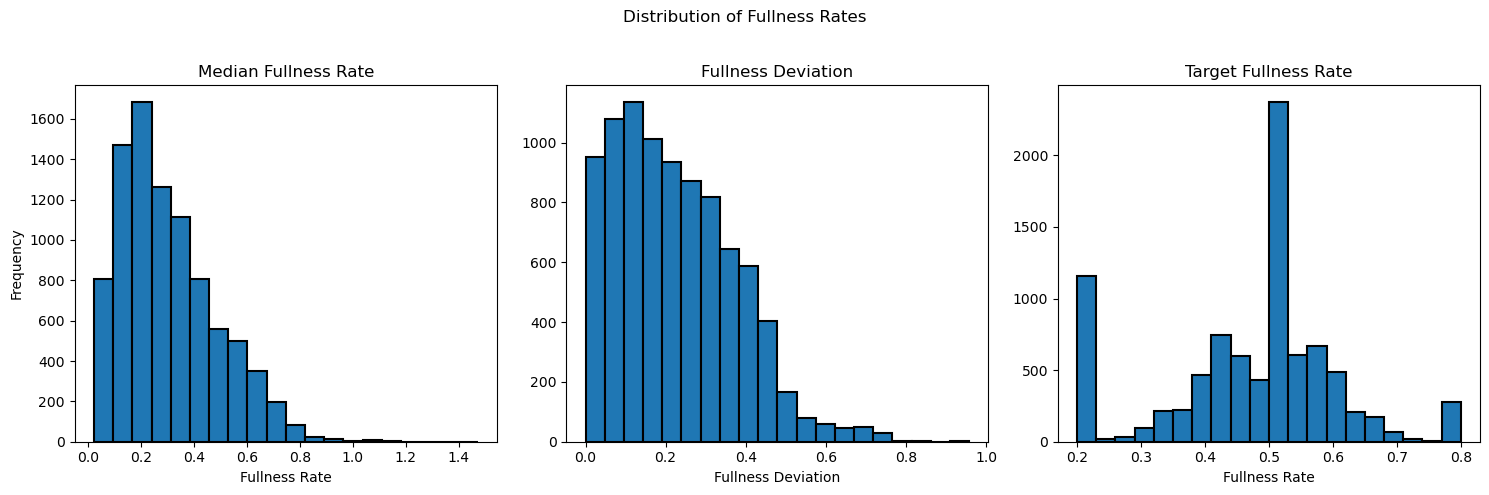

In [14]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Define border properties for the bins
bin_border_color = 'black'
bin_border_width = 1.5

# Plot the histograms with borders around the bins
axs[0].hist(efficiency_data['median_fullness_rate'], bins=20, edgecolor=bin_border_color, linewidth=bin_border_width)
axs[0].set_title('Median Fullness Rate')
axs[0].set_xlabel('Fullness Rate')
axs[0].set_ylabel('Frequency')

axs[1].hist(efficiency_data['fullness_deviation'], bins=20, edgecolor=bin_border_color, linewidth=bin_border_width)
axs[1].set_title('Fullness Deviation')
axs[1].set_xlabel('Fullness Deviation')

axs[2].hist(efficiency_data['target_fullness'], bins=20, edgecolor=bin_border_color, linewidth=bin_border_width)
axs[2].set_title('Target Fullness Rate')
axs[2].set_xlabel('Fullness Rate')

# Add a main title for the entire figure
fig.suptitle('Distribution of Fullness Rates')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

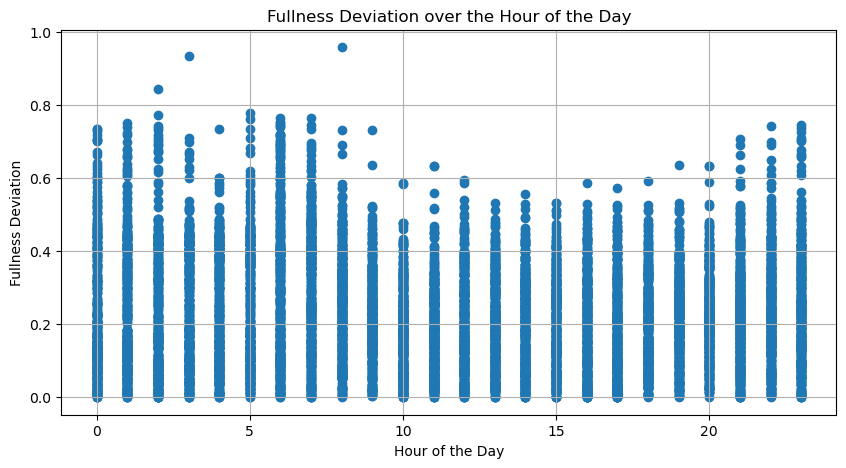

In [17]:
# During what time of the day (hour), was the fullness deviation the highest?
# Plot the fullness deviation over the hour of the day
plt.figure(figsize=(10, 5))
plt.scatter(efficiency_data['hour'], efficiency_data['fullness_deviation'])
plt.title('Fullness Deviation over the Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fullness Deviation')
plt.grid(True)
plt.show()



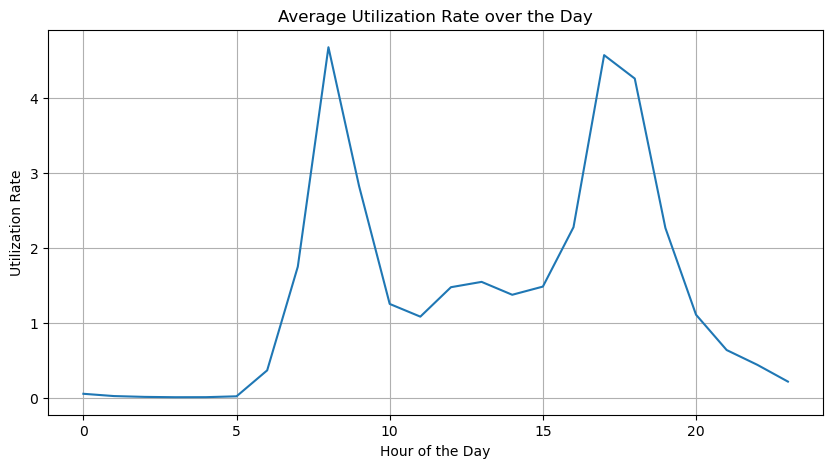

In [16]:
# Plot the average utilization rate over the day
plt.figure(figsize=(10, 5))
plt.plot(efficiency_data.groupby('hour')['Utilisation_avg'].mean())
plt.title('Average Utilization Rate over the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Utilization Rate')
plt.grid(True)
plt.show()


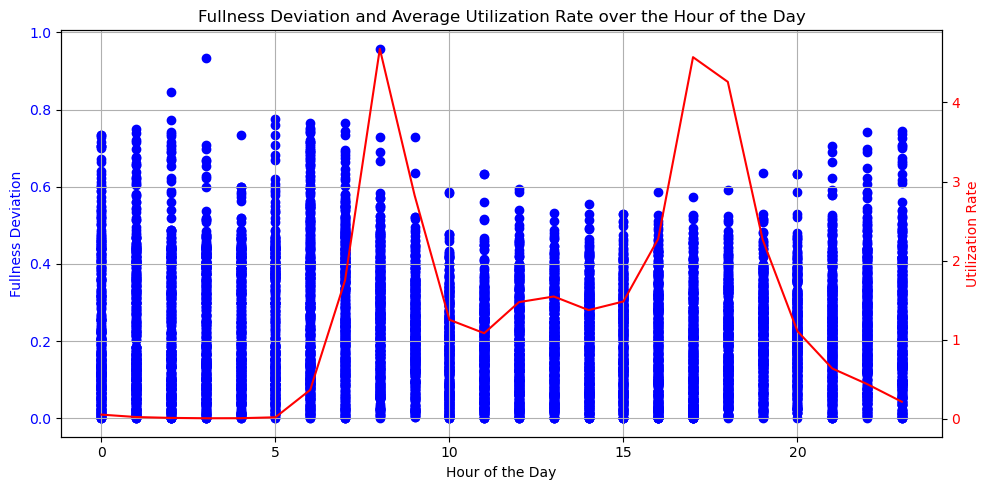

In [18]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Fullness Deviation as a scatter plot
ax1.scatter(efficiency_data['hour'], efficiency_data['fullness_deviation'], color='b', label='Fullness Deviation')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Fullness Deviation', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis for Utilization Rate
ax2 = ax1.twinx()
ax2.plot(efficiency_data.groupby('hour')['Utilisation_avg'].mean(), color='r', label='Utilization Rate')
ax2.set_ylabel('Utilization Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add titles and show the plot
plt.title('Fullness Deviation and Average Utilization Rate over the Hour of the Day')
fig.tight_layout()  # To make sure labels don't overlap
plt.show()

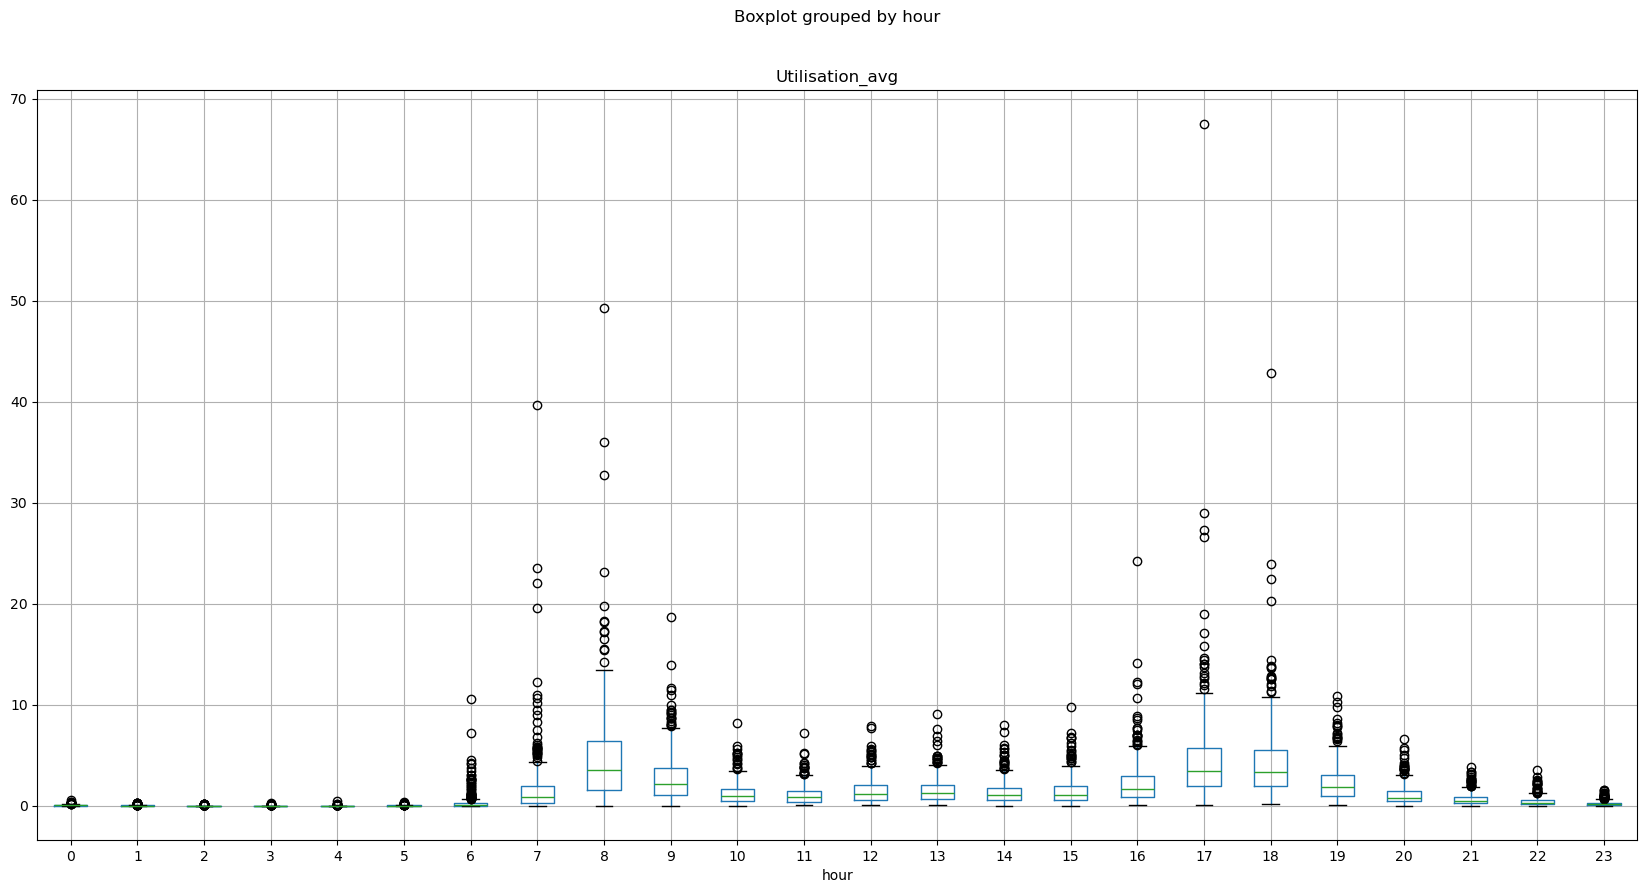

In [19]:
# boxplot of efficiency scores 
fig, ax = plt.subplots(figsize=(20, 10))
efficiency_data.boxplot(column='Utilisation_avg', by='hour', ax=ax)
plt.show()

In [ ]:
# Plot the distribution of number of observations per hour
fig, ax = plt.subplots(figsize=(20, 10))
efficiency_data.boxplot(column='Utilisation_avg', by='hour', ax=ax)
plt.show()
